---
title: "Spider vs House Fly Classifier"
author: "Andrew Krcatovich"
date: "2023-09-06"
categories: [fastai]
---

In [1]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [2]:
urls = search_images('spider', max_images=1)
urls[0]

/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'http://upload.wikimedia.org/wikipedia/commons/9/9b/Banana_Spider.jpg'

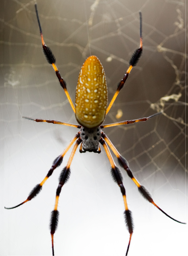

In [3]:
from fastdownload import download_url
dest = 'spider.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


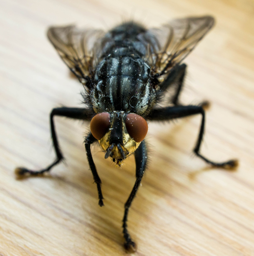

In [4]:
download_url(search_images('house fly photos', max_images=1)[0], 'fly.jpg', show_progress=False)
Image.open('fly.jpg').to_thumb(256,256)

In [6]:
searches = 'spider','house fly'
path = Path('spider_or_fly')
from time import sleep

# for o in searches:
#     dest = (path/o)
#     dest.mkdir(exist_ok=True, parents=True)
#     download_images(dest, urls=search_images(f'{o} photo'))
#     sleep(10)
#     resize_images(path/o, max_size=400, dest=path/o)

In [7]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

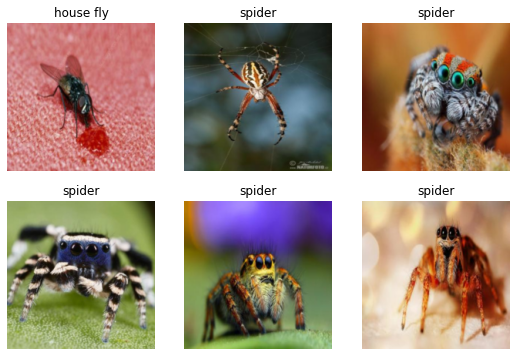

In [8]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.012352,0.210427,0.125000,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.439026,0.211611,0.156250,00:01
1,0.283538,0.130849,0.031250,00:01
2,0.210751,0.062095,0.031250,00:01
3,0.156668,0.024983,0.000000,00:01
4,0.122935,0.011209,0.000000,00:01
5,0.100860,0.008166,0.000000,00:01


In [11]:
is_fly,_,probs = learn.predict(PILImage.create('spider.jpg'))
print(f"This is a: {is_spider}.")
print(f"Probability it's a fly: {probs[0]:.4f}")

This is a: spider.
Probability it's a fly: 0.0011


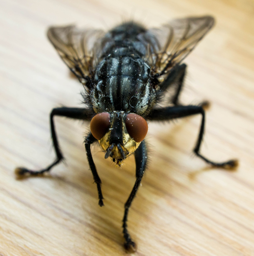

In [17]:
PILImage.create('fly.jpg').to_thumb(256,256)

In [12]:
learn.export()